### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Perceptron Class

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.01, num_epochs=1000, early_stopping_patience=5):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.early_stopping_patience = early_stopping_patience
        self.weights = None
        self.bias = None
        self.misclassifications_ = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0
        
        # To store the best weights and bias
        best_weights = None
        best_bias = None
        best_epoch = 0
        min_misclassifications = float('inf')

        # To trigger early stopping
        patience = 0

        for epoch in range(1, self.num_epochs+1):
            misclassifications = 0
            
            for idx, xi in enumerate(X):
                linear_output = np.dot(xi, self.weights) + self.bias
                y_predicted = self._activation(linear_output)
                
                if y[idx] != y_predicted:
                    update = self.learning_rate * y[idx]
                    self.weights += update * xi
                    self.bias += update
                    misclassifications += 1
            
            # Store misclassifications for current epoch
            self.misclassifications_.append(misclassifications)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}/{self.num_epochs}, Misclassifications: {misclassifications}")

            # Check if this is the best epoch so far
            if misclassifications < min_misclassifications:
                min_misclassifications = misclassifications
                best_weights = self.weights.copy()
                best_bias = self.bias
                best_epoch = epoch
                
            # Early stopping logic
            if misclassifications == 0:
                patience += 1
                if patience == self.early_stopping_patience:
                    print(f"Stopping the training early at epoch {epoch}.")
                    break
                    
                print(f"Zero misclassifications at epoch {epoch}. Waiting for {self.early_stopping_patience - patience} more epochs for confirmation.")
            else:
                patience = 0 
        
        # After training, restore the best weights and bias
        print(f"Restoring model to best epoch {best_epoch} with {min_misclassifications} misclassifications.")
        self.weights = best_weights
        self.bias = best_bias

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._activation(linear_output)

    def _activation(self, x):
        return np.where(x >= 0, 1, -1)

    def plot_convergence(self):
        plt.plot(range(1, len(self.misclassifications_) + 1), self.misclassifications_)
        plt.title('Perceptron Convergence')
        plt.xlabel('Epochs')
        plt.ylabel('Misclassifications')
        plt.show()


### Dataset Preparation

In [3]:
dataset_path = "diabetes_scale.svm"
X, y = load_svmlight_file(dataset_path)
X = X.toarray()

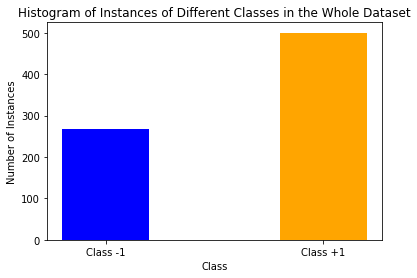

In [4]:
unique, counts = np.unique(y, return_counts=True)

plt.bar(unique, counts, tick_label=['Class -1', 'Class +1'], color=['blue', 'orange'])
plt.title('Histogram of Instances of Different Classes in the Whole Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Instances')

plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [6]:
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (691, 8), X_test: (77, 8), y_train: (691,), y_test: (77,)


In [7]:
print(X_train[:5, :])
print(y_train[:5])

[[-0.882353   0.447236   0.344262  -0.0707071 -0.574468   0.374069
  -0.780529  -0.166667 ]
 [-0.411765   0.125628   0.0819672 -1.        -1.         0.126677
  -0.843723  -0.333333 ]
 [-1.         0.0251256  0.278689  -0.191919  -0.787234   0.028316
  -0.863365  -0.9      ]
 [-0.647059   0.58794    0.0491803 -0.737374  -0.0851064 -0.0700447
  -0.814688  -0.9      ]
 [-1.         0.21608    0.0819672 -0.393939  -0.609929   0.0223547
  -0.893254  -0.6      ]]
[-1. -1.  1.  1. -1.]


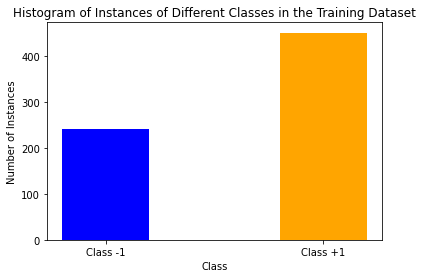

In [8]:
unique, counts = np.unique(y_train, return_counts=True)

plt.bar(unique, counts, tick_label=['Class -1', 'Class +1'], color=['blue', 'orange'])
plt.title('Histogram of Instances of Different Classes in the Training Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Instances')

plt.show()

### Training

Training with different learning rate and choose the model with best performance with appropriate learning rate.

#### Learning rate 0.1

In [15]:
perceptron = Perceptron(learning_rate=0.1, num_epochs=1000)
perceptron.fit(X_train, y_train)

Epoch 10/1000, Misclassifications: 195
Epoch 20/1000, Misclassifications: 209
Epoch 30/1000, Misclassifications: 205
Epoch 40/1000, Misclassifications: 206
Epoch 50/1000, Misclassifications: 201
Epoch 60/1000, Misclassifications: 203
Epoch 70/1000, Misclassifications: 208
Epoch 80/1000, Misclassifications: 208
Epoch 90/1000, Misclassifications: 217
Epoch 100/1000, Misclassifications: 211
Epoch 110/1000, Misclassifications: 192
Epoch 120/1000, Misclassifications: 205
Epoch 130/1000, Misclassifications: 208
Epoch 140/1000, Misclassifications: 213
Epoch 150/1000, Misclassifications: 208
Epoch 160/1000, Misclassifications: 210
Epoch 170/1000, Misclassifications: 204
Epoch 180/1000, Misclassifications: 219
Epoch 190/1000, Misclassifications: 201
Epoch 200/1000, Misclassifications: 195
Epoch 210/1000, Misclassifications: 201
Epoch 220/1000, Misclassifications: 209
Epoch 230/1000, Misclassifications: 206
Epoch 240/1000, Misclassifications: 203
Epoch 250/1000, Misclassifications: 204
Epoch 260

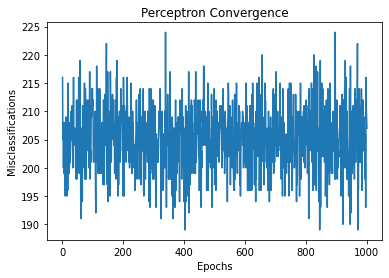

In [16]:
# Plot the convergence
perceptron.plot_convergence()

In [17]:
# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.59      0.70      0.64        27
         1.0       0.82      0.74      0.78        50

    accuracy                           0.73        77
   macro avg       0.71      0.72      0.71        77
weighted avg       0.74      0.73      0.73        77



#### Learning rate 0.01

In [9]:
perceptron = Perceptron(learning_rate=0.01, num_epochs=1000)
perceptron.fit(X_train, y_train)

Epoch 10/1000, Misclassifications: 213
Epoch 20/1000, Misclassifications: 212
Epoch 30/1000, Misclassifications: 208
Epoch 40/1000, Misclassifications: 208
Epoch 50/1000, Misclassifications: 206
Epoch 60/1000, Misclassifications: 211
Epoch 70/1000, Misclassifications: 209
Epoch 80/1000, Misclassifications: 197
Epoch 90/1000, Misclassifications: 205
Epoch 100/1000, Misclassifications: 201
Epoch 110/1000, Misclassifications: 201
Epoch 120/1000, Misclassifications: 215
Epoch 130/1000, Misclassifications: 209
Epoch 140/1000, Misclassifications: 205
Epoch 150/1000, Misclassifications: 207
Epoch 160/1000, Misclassifications: 198
Epoch 170/1000, Misclassifications: 213
Epoch 180/1000, Misclassifications: 208
Epoch 190/1000, Misclassifications: 200
Epoch 200/1000, Misclassifications: 202
Epoch 210/1000, Misclassifications: 200
Epoch 220/1000, Misclassifications: 199
Epoch 230/1000, Misclassifications: 203
Epoch 240/1000, Misclassifications: 207
Epoch 250/1000, Misclassifications: 199
Epoch 260

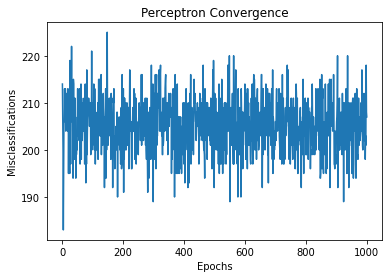

In [10]:
# Plot the convergence
perceptron.plot_convergence()

In [11]:
# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65        27
         1.0       0.81      0.84      0.82        50

    accuracy                           0.77        77
   macro avg       0.74      0.73      0.74        77
weighted avg       0.76      0.77      0.76        77



#### Learning Rate 0.001

In [12]:
perceptron = Perceptron(learning_rate=0.001, num_epochs=1000)
perceptron.fit(X_train, y_train)

Epoch 10/1000, Misclassifications: 204
Epoch 20/1000, Misclassifications: 207
Epoch 30/1000, Misclassifications: 214
Epoch 40/1000, Misclassifications: 211
Epoch 50/1000, Misclassifications: 210
Epoch 60/1000, Misclassifications: 201
Epoch 70/1000, Misclassifications: 215
Epoch 80/1000, Misclassifications: 202
Epoch 90/1000, Misclassifications: 208
Epoch 100/1000, Misclassifications: 205
Epoch 110/1000, Misclassifications: 200
Epoch 120/1000, Misclassifications: 217
Epoch 130/1000, Misclassifications: 197
Epoch 140/1000, Misclassifications: 212
Epoch 150/1000, Misclassifications: 208
Epoch 160/1000, Misclassifications: 213
Epoch 170/1000, Misclassifications: 214
Epoch 180/1000, Misclassifications: 211
Epoch 190/1000, Misclassifications: 200
Epoch 200/1000, Misclassifications: 218
Epoch 210/1000, Misclassifications: 209
Epoch 220/1000, Misclassifications: 197
Epoch 230/1000, Misclassifications: 207
Epoch 240/1000, Misclassifications: 212
Epoch 250/1000, Misclassifications: 204
Epoch 260

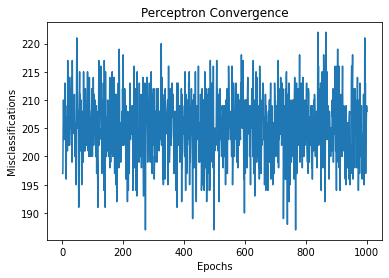

In [13]:
# Plot the convergence
perceptron.plot_convergence()

In [14]:
# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.59      0.48      0.53        27
         1.0       0.75      0.82      0.78        50

    accuracy                           0.70        77
   macro avg       0.67      0.65      0.66        77
weighted avg       0.69      0.70      0.69        77

